# <u>Logistic Regression for cat classification

This is a cat classification problem, where the task is to classify a picture as a cat or non-cat picture.
<br>Output y = 1 if the picture is of a cat 
<br>Output y = 0 if the picture is not of a cat

In [1]:
# import the libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import dataset_utility as du

%matplotlib inline

### Data loading and preprocessing work

The dataset contains cat and non-cat pictures and the labels are 0 or 1.<br>


In [74]:
# load the data set
test_loc = r'datasets\train_catvsnoncat.h5'
train_loc = r'datasets\test_catvsnoncat.h5'

train_X, train_y, test_X, test_y = du.load_data2(train_loc, test_loc)

print('Training features shape:'+ str(train_X.shape))
print('Training output shape:'+ str(train_y.shape))
print('Test features shape:'+ str(test_X.shape))
print('Test output shape:'+ str(test_y.shape))

Training features shape:(209, 64, 64, 3)
Training output shape:(209,)
Test features shape:(50, 64, 64, 3)
Test output shape:(50,)


### 1) <u>Reshape the matrices.</u>
### 2) <u>Flatten the feature matrix and create one hot matrix for output labels

In [75]:
# reshape the output matrices to avoid it being treated as rank 1 matrix
train_y = np.reshape(train_y, (train_y.shape[0],1))
test_y = np.reshape(test_y, (test_y.shape[0],1))

In [77]:
# noramalize the features
train_X, test_X = du.normalize_data( train_X, test_X)

# flatten the feature matrix
train_X, test_X = du.unroll_features(train_X, test_X)

# transpose the label matrices to match the dimension format
train_y = train_y.T
test_y = test_y.T

In [78]:
# check the dimensions
print('Training features shape:'+ str(train_X.shape))
print('Training output shape:'+ str(train_y.shape))
print('Test features shape:'+ str(test_X.shape))
print('Test output shape:'+ str(test_y.shape))

Training features shape:(12288, 209)
Training output shape:(1, 209)
Test features shape:(12288, 50)
Test output shape:(1, 50)


## <u>Model Creation 

### Initialize weight and bias parameters


In [79]:
def initialize_parameters(n):
    parameters = {}
    # we will use zero initialization
    parameters['W'] = np.zeros((n,1), dtype = np.float64)
    # bias
    parameters['b'] = 0
    
    return parameters

In [80]:
# for doing the sigmoid function
def sigmoid(z):
    return (1/ (1 + np.exp(-z)))

### Cost Function

In [81]:
# for computing the logistic error
def compute_cost(train_y, y_hat):
    cost = (1/train_y.shape[1]) * np.sum( -train_y*np.log(y_hat) - (1-train_y)*np.log(1 - y_hat) )
    return cost

In [85]:
def gradient_descent(parameters, train_X, train_y, y_hat, learning_rate):
    # find the derivatives
    dw = (1/train_X.shape[1]) * np.dot( train_X, (y_hat - train_y).T )
    db = (1/train_X.shape[1]) * np.sum( y_hat - train_y ) 
    
    # update the parameters
    parameters['W'] = parameters['W'] - (learning_rate * dw)
    parameters['b'] = parameters['b'] - (learning_rate * db)
   
    return parameters

In [114]:
def model(train_X, train_y, num_iters, learning_rate):
    
    parameters = initialize_parameters(train_X.shape[0])
    
    # for storing cost
    costs = []
    
    for iter in range(num_iters):
        z = np.dot(parameters['W'].T, train_X) + parameters['b']
        y_hat = sigmoid(z)
        J = compute_cost(train_y, y_hat)
   
        costs.append(J)
        parameters = gradient_descent(parameters, train_X, train_y, y_hat, learning_rate)
        
        if iter % 100 == 0:
            print('Cost after iteration %i: %f'%(iter,J))
    
    return parameters, costs

In [134]:
num_iters = 2000
learning_rate = 0.005
# train the model to find the weights
parameters, costs = model(train_X, train_y, num_iters, learning_rate)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872


In [135]:
def predict(features_X, parameters):
    # find the output of logistic regression
    z = np.dot(parameters['W'].T, features_X) + parameters['b']
    pred = sigmoid(z)
    # if the output is >0.5 then we consider that the picture is of a cat else it is a non-cat picture. 
    pred = (pred > 0.5)
    
    return pred    

In [136]:
prediction_train = predict(train_X, parameters)
prediction_test = predict(test_X, parameters)

In [137]:
# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - train_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - test_y)) * 100))

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


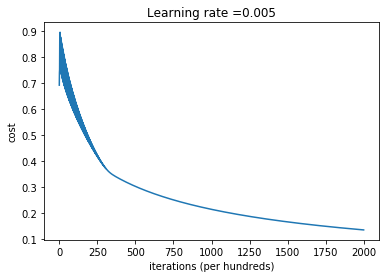

In [138]:
# Plot learning curve( cost vs iterations)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()